# **Ниже представлен EDA-анализ отзывов клиентов британской авиакомпании British Airways в период с 2016 по 2023 год.**

> **Таблица включает в себя:**
> - Отзывы *(верифицированные и неверифицированные)*
> - Дату создания отзыва
> - Страну клиента
> - Тип места *(эконом, премиум-эконом, бизнес и первый класс)*
> - Рекомендует ли клиент компанию *(Да / Нет)*
> - Маршрут, по которому передвигался клиент
> - С кем передвигался клиент *(один, вдвоем, с семьей)*

---

# **Импорт данных**

In [336]:
# Импорт, стиль и цвет графиков
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
colors = plt.cm.tab20(range(100))

In [337]:
# Читаем csv
df = pd.read_csv(r'C:\Users\ntretiakov\Desktop\Python\datasets\British_Airway_Review.csv')
df.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


---

# **Подготовка данных**

![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)      **Отзывы от верифицированных пользователей** занимают 43.6% от общего количества отзывов. Тем не менее, с целью повысить достоверность данных, принято решение убрать отзывы, которые сделаны с неверифицированных аккаунтов:

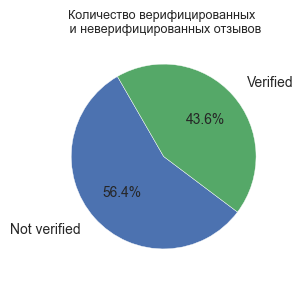

In [338]:
# Код
# Соотносим верифицированных и неверифицированных пользователей
# Деление на две категории (verified & not_verified)
df['verified_review'] = df.reviews.map(lambda v: 'verified' if v.startswith('✅ Trip Verified') else 'not_verified')
verified_percentage = df['verified_review'].value_counts(normalize=True).round(3)
verified_count = df['verified_review'].value_counts()

# Pie
plt.figure(figsize=(5,3))
plt.pie(verified_percentage, labels=['Not verified', 'Verified'], autopct='%1.1f%%', startangle=120,
       pctdistance=0.6, labeldistance=1.2)
plt.title('Количество верифицированных \n и неверифицированных отзывов', size=9)
plt.show()

In [339]:
# Убираем неверифицированных пользователей
df.drop(df[df.verified_review == 'not_verified'].index, inplace=True)
df.drop('verified_review', axis=1, inplace=True)

> **Также, необходимо:**
> - убрать статус ✅ Trip Verified из каждого отзыва.
> - изменить формат даты в колонке date

In [340]:
# Убираем статус ✅ Trip Verified из каждого отзыва
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [341]:
# Меняем формат даты
df.date = pd.to_datetime(df['date'], format='mixed')

In [342]:
# Обновляем нумерацию после преобразований
df.reset_index(drop=True, inplace=True)

In [343]:
df.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,I had the most fantastic BA Flight today. Th...,2023-08-01,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,Couldn’t book in online. Arrived at check in...,2023-07-31,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,London Heathrow to Mumbai in a Boeing 787-8 i...,2023-07-31,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"Keflavík, Iceland to London Heathrow on an A3...",2023-07-31,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,Terrible Experience with British Airways. I b...,2023-07-29,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     *Нулевые значения **отсутствуют:***

In [344]:
# Код
df.isna().sum()

reviews              0
date                 0
country              0
seat_type            0
recommended          0
stars                0
route                0
type_of_traveller    0
dtype: int64

---

![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     **Классификация отзывов на 3 категории:** 
- позитивный,
- нейтральный,
- негативный

Для классификации я буду использовать модель **Vader**, которая анализирует каждое слово и делает предположение о "настроении" текста. Проблема этой модели заключается в том, что она довольно "прямо" смотрит на текст, не распознавая сарказма и прочих тонких моментов человеческой речи. Тем не менее, я рассчитываю на то, что эта модель даст корректный результат.

После всех преобразований в таблице появится столбец Sentiment, в котором указана категория каждого отзыва.

In [345]:
# Код
# Анализируем отзывы
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Анализ каждой строки
scores = []

for i in range(len(df.reviews)):
    score = analyzer.polarity_scores(df.reviews[i])
    score = score['compound']
    scores.append(score)

sentiment = []

# Деление результатов на три категории (Positive, Negative, Neutral)
for i in scores:
    if i <= (-0.5):
        sentiment.append('Negative')
    elif i >= 0.5:
        sentiment.append('Positive')
    else:
        sentiment.append('Neutral')

df['Sentiment'] = pd.Series(np.array(sentiment))

In [346]:
df.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,Sentiment
0,I had the most fantastic BA Flight today. Th...,2023-08-01,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,Positive
1,Couldn’t book in online. Arrived at check in...,2023-07-31,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,Positive
2,London Heathrow to Mumbai in a Boeing 787-8 i...,2023-07-31,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,Positive
3,"Keflavík, Iceland to London Heathrow on an A3...",2023-07-31,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure,Neutral
4,Terrible Experience with British Airways. I b...,2023-07-29,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure,Neutral


---

# **Исследовательский анализ данных (EDA)**

## ![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     Распределение отзывов по категориям

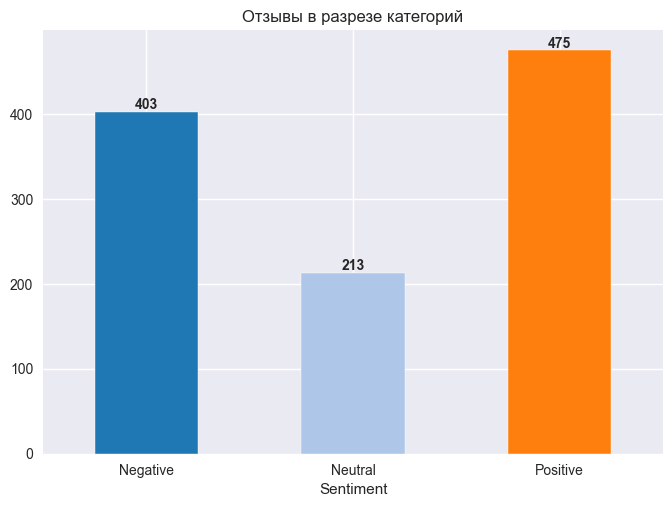

In [347]:
# Код
# Распределение отзывов по категориям
sentiment_counts = pd.DataFrame(df.groupby('Sentiment')['reviews'].count())
sentiment_percentage = pd.DataFrame(df.Sentiment.value_counts(normalize=True).round(3))['proportion']
sentiment_sums = sentiment_counts.join(sentiment_percentage * 100)
sentiment_sums.columns = ['Count', 'Percentage']
#sentiment_sums, 
sentiment_sums.Count.plot(kind='bar', rot=0, color=colors)

# Значения на каждой шкале
for index, value in enumerate(sentiment_sums.Count):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')
plt.title('Отзывы в разрезе категорий')
plt.show()

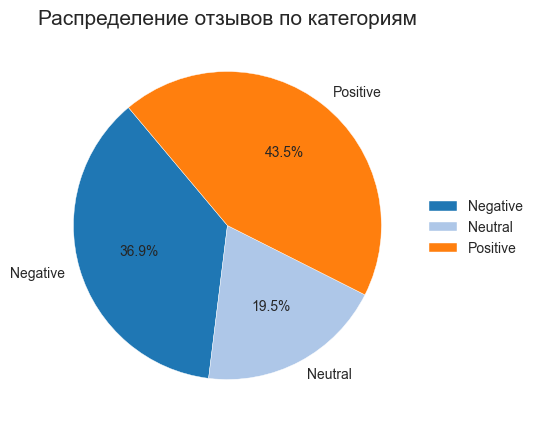

In [348]:
# Код
# Круговая диаграмма
sns.set_style('darkgrid')
plt.figure(figsize=(6, 5))
plt.title('Распределение отзывов по категориям', size=15)
plt.pie(sentiment_sums.Percentage, labels=sentiment_sums.index, startangle=130, autopct='%1.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.3,0.6))
plt.show()

> Больше всего **положительных** отзывов (43.5%), **отрицательных** - 36.9%, **нейтральных** - 19.5%.
Иначе говоря, большинство людей не остаются нейтральными по отношению к сервису. Они имеют либо положительное, либо негативное мнение.

---

## ![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     Распределение оценок (от 1 до 10)

In [349]:
# Код
# Делаем подсчет по каждой оценке
stars_counts = pd.DataFrame(df.groupby('stars')['reviews'].count().sort_index())
stars_percentage = pd.DataFrame(df.stars.value_counts(normalize=True).round(2))
stars_sums = stars_counts.join(stars_percentage)
stars_sums.columns = ['Count', 'Percentage']
stars_sums.sort_index(ascending=False)

,Count,Percentage
stars,,
9,96,0.09
7,100,0.09
5,303,0.28
3,498,0.46
1,94,0.09


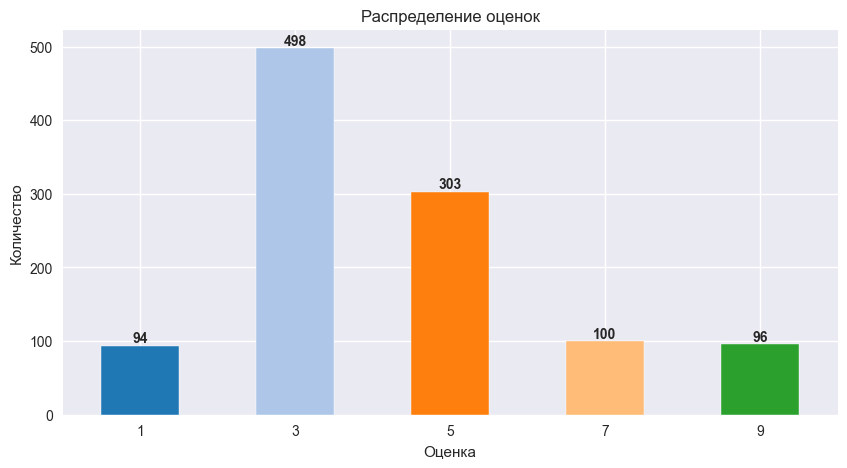

In [350]:
# Код
# Строим график
stars_sums.Count.plot(kind='bar', figsize=(10, 5), rot=0, ylabel='Count', title='Распределение оценок', color=colors)

# Значения на каждой шкале
for index, value in enumerate(stars_sums.Count):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()

> **Самая распространенная оценка - 3**. На втором месте - 5. 
>
>1, 7 и 9 встречаются практически одинаково.

---

## ![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     Топ-10 стран по количеству отзывов

In [351]:
# Код
top10_countries = pd.DataFrame(df.groupby('country')['reviews'].count().sort_values(ascending=False))
top10_countries = top10_countries.iloc[np.arange(10)]
top10_countries.reset_index(inplace=True)
top10_countries

,country,reviews
0,United Kingdom,614
1,United States,162
2,Australia,35
3,Canada,34
4,Germany,29
5,South Africa,15
6,Netherlands,12
7,France,12
8,Switzerland,12
9,India,11


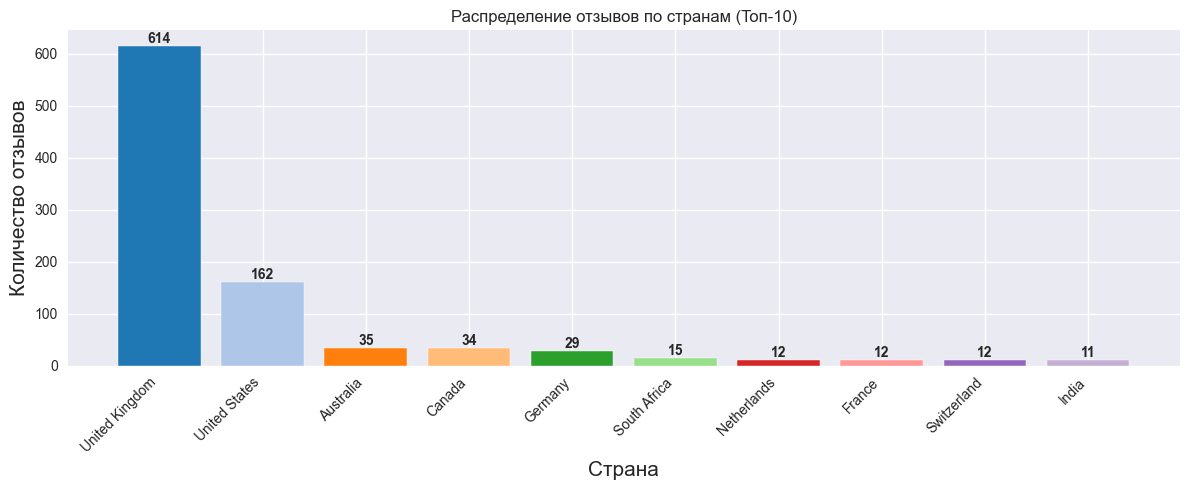

In [352]:
# Код
# Строим график
plt.figure(figsize=(12, 5))
plt.bar(top10_countries.country, top10_countries.reviews, color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Значения на каждой шкале
for index, value in enumerate(top10_countries.reviews):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Страна', size='15')
plt.ylabel('Количество отзывов', size='15')
plt.title('Распределение отзывов по странам (Toп-10)')

plt.tight_layout()

plt.show()

> **Большинство верифицированных пользователей** (клиентов) сервиса являются жителями **Великобритании**.

---

## ![Image](//2.downloader.disk.yandex.ru/preview/5a06ea66d95ee2ccc7c3451907d77299844ead72c28eb0b64723d62b53cc1107/inf/epAWBve42w4CqhI-JMQfFgpopFVa7bX77RIl7h3-rvHCc53OMXSvqW5lchtSbjELo6jckbsA4tKwXCvv-_NGWQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     Отзывы в динамике лет

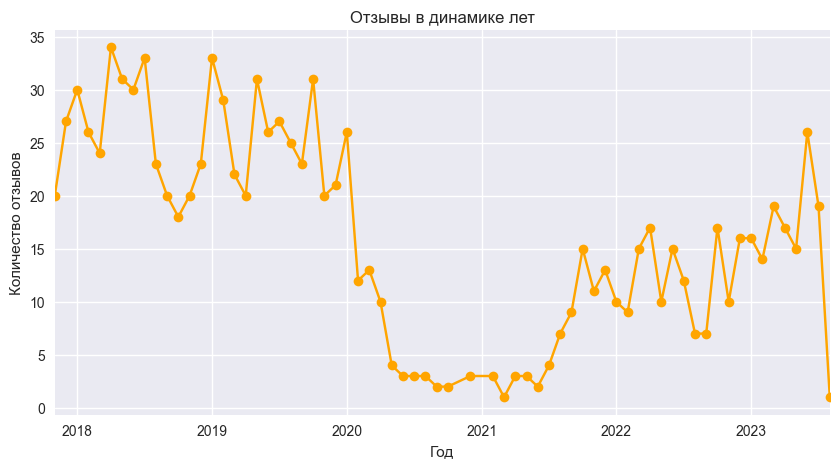

In [353]:
# Код
df['month_year'] = df['date'].dt.to_period('M')
df.month_year.value_counts().sort_index().plot(kind='line', figsize=(10, 5), marker='o', color='orange')
plt.xlabel('Год')
plt.ylabel('Количество отзывов')
plt.title('Отзывы в динамике лет')
plt.show()

> Как можно заметить, количество отзывов **резко понизилось** после начала **COVID-19**.
>
> Это, в свою очередь, могло заставить авиакомпанию существенно **снизить затраты**, что за собой могло повлечь **снижение качества** предоставляемого сервиса.
>
> Чтобы проверить это, необходимо посмотреть **соотношение** положительных и отрицательных отзывов за 3 периода: 
>>  **Группа 1**: С 2018 по 2020 год *(до COVID-19)*
>> 
>>  **Группа 2**: С 2020 по 2021 год *(во время COVID-19)*
>> 
>>  **Группа 3**: С 2021 по 2023 год *(после COVID-19)*

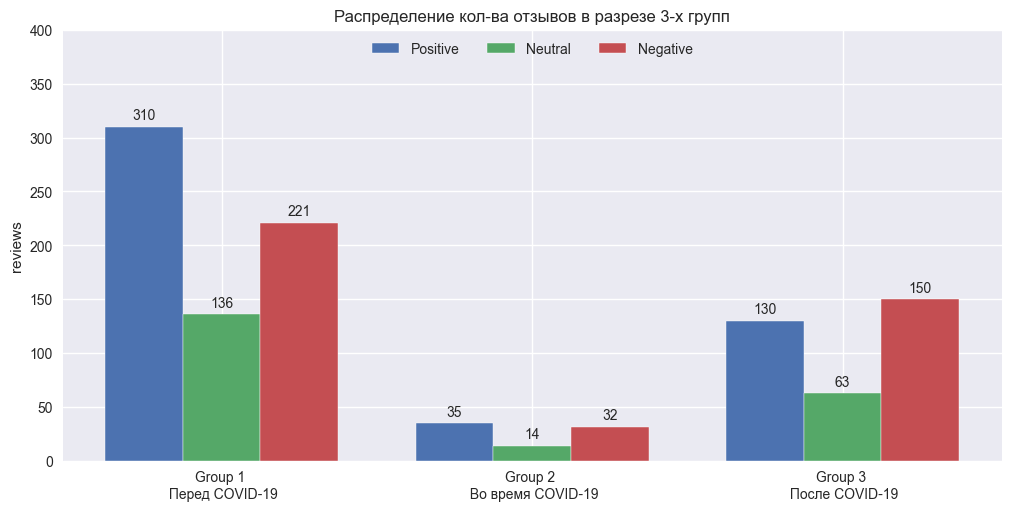

In [354]:
# Код
# Мэтчим каждое значение по группе в таблице
y2020 = pd.to_datetime('2020-01-01', format='mixed')
y2021 = pd.to_datetime('2021-01-01', format='mixed')
df['groups_by_date'] = df.date.map(lambda v: 'Group 1' if v < y2020 else('Group 2' if y2020 < v < y2021 else 'Group 3'))
groups_COVID19 = df.groupby(['groups_by_date', 'Sentiment'])[['reviews']].count()

# Подготавливаем к посторению bar plot
neg = groups_COVID19[(groups_COVID19.index == ('Group 1', 'Negative')) | (groups_COVID19.index == ('Group 2', 'Negative')) | 
               (groups_COVID19.index == ('Group 3', 'Negative'))]

neu = groups_COVID19[(groups_COVID19.index == ('Group 1', 'Neutral')) | (groups_COVID19.index == ('Group 2', 'Neutral')) | 
               (groups_COVID19.index == ('Group 3', 'Neutral'))]

pos = groups_COVID19[(groups_COVID19.index == ('Group 1', 'Positive')) | (groups_COVID19.index == ('Group 2', 'Positive')) | 
               (groups_COVID19.index == ('Group 3', 'Positive'))]
neg_dict = {'Negative': neg.reviews.values}
neu_dict = {'Neutral': neu.reviews.values}
pos_dict = {'Positive': pos.reviews.values}
dictv = pos_dict | neu_dict | neg_dict


groups = ("Group 1 \n Перед COVID-19", "Group 2 \n Во время COVID-19", "Group 3 \n После COVID-19")
penguin_means = dictv

x = np.arange(len(groups))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Barplot
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for attribute, measurement in dictv.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('reviews')
ax.set_title('Распределение кол-ва отзывов в разрезе 3-х групп')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper center', ncols=3)
ax.set_ylim(0, 400)

plt.show()

> Таким образом, мы видим, что во время COVID-19 **качество сервиса немного упало** - соотношение положительных и отрицательных отзывов изменилось. Подтверждением падению сервиса является Group 3 (После COVID-19), в которой отчтетливо видно, что отношение положительных отзывов к отрицательным **еще сильнее уменьшилось**. Таким образом, несмотря на общее количество отзывов в разрезе трех групп, можно отчетливо заметить **тенденцию снижения положительных отзывов.**
>
> На это мог повлиять как COVID-19, так и что-то другое. Однако, тенденция снижения положительных отзывов уже обнаружена. 
>
> Рассмотрим ее детальнее на следующем графике.

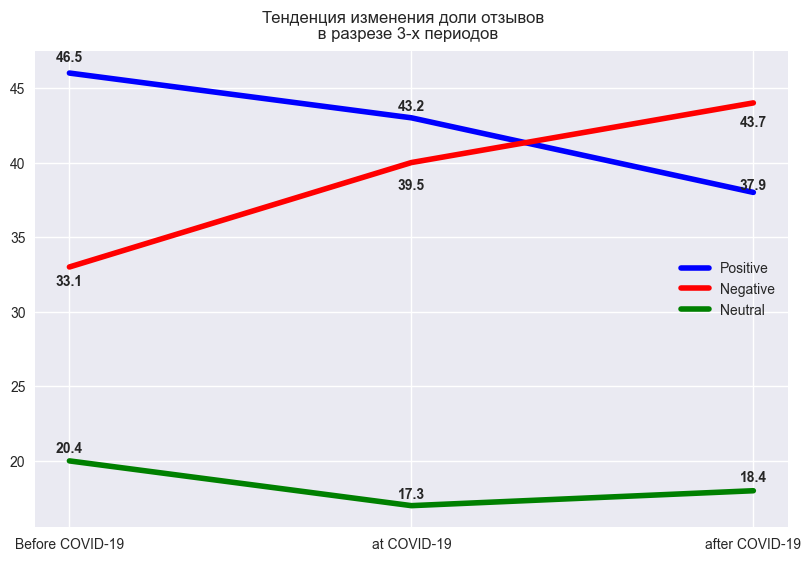

In [355]:
# Код
# Подготовка данных для графика
#m1 = (groups_COVID19.index == ('Group 1', 'Negative')) | (groups_COVID19.index == ('Group 1', 'Neutral')) | (groups_COVID19.index == ('Group 1', 'Positive'))
m2 = (groups_COVID19.index == ('Group 2', 'Negative')) | (groups_COVID19.index == ('Group 2', 'Neutral')) | (groups_COVID19.index == ('Group 2', 'Positive'))
m3 = (groups_COVID19.index == ('Group 3', 'Negative')) | (groups_COVID19.index == ('Group 3', 'Neutral')) | (groups_COVID19.index == ('Group 3', 'Positive'))
group1 = groups_COVID19[(groups_COVID19.index == ('Group 1', 'Negative')) | (groups_COVID19.index == ('Group 1', 'Neutral')) | (groups_COVID19.index == ('Group 1', 'Positive'))]
group2 = groups_COVID19[m2]
group3 = groups_COVID19[m3]
group1.index = ['Negative', 'Neutral', 'Positive']
group2.index = ['Negative', 'Neutral', 'Positive']
group3.index = ['Negative', 'Neutral', 'Positive']

sum1 = group1.reviews.sum()
sum2 = group2.reviews.sum()
sum3 = group3.reviews.sum()
group1['Percentage'] = group1.reviews.map(lambda v: ((v/sum1)*100).round(1))
group2['Percentage'] = group2.reviews.map(lambda v: ((v/sum2)*100).round(1))
group3['Percentage'] = group3.reviews.map(lambda v: ((v/sum3)*100).round(1))

pos_perc = pd.Series([group1.iloc[2, 1], group2.iloc[2, 1], group3.iloc[2, 1]], ['Before COVID-19', 'at COVID-19', 'after COVID-19'])
neg_perc = pd.Series([group1.iloc[0, 1], group2.iloc[0, 1], group3.iloc[0, 1]], ['Before COVID-19', 'at COVID-19', 'after COVID-19'])
neu_perc = pd.Series([group1.iloc[1, 1], group2.iloc[1, 1], group3.iloc[1, 1]], ['Before COVID-19', 'at COVID-19', 'after COVID-19'])

# График
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, layout='constrained')

fig.suptitle('Тенденция изменения доли отзывов \n в разрезе 3-х периодов')

ax.plot(pos_perc.index, pos_perc.values.round(0), 'blue', label='Positive', linewidth=4)
ax.plot(neg_perc.index, neg_perc.values.round(0), 'red', label='Negative', linewidth=4)
ax.plot(neu_perc.index, neu_perc.values.round(0), 'green', label='Neutral', linewidth=4)

# Значения на каждой шкале
for index, value in enumerate(pos_perc.values.round(2)):
    plt.text(index, value+0.1, str(value), ha='center', va='bottom', fontweight='bold')
for index, value in enumerate(neg_perc.values.round(2)):
    plt.text(index, value-1.5, str(value), ha='center', va='bottom', fontweight='bold')
for index, value in enumerate(neu_perc.values.round(2)):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

ax.legend()
plt.show()

In [356]:
df.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,Sentiment,month_year,groups_by_date
0,I had the most fantastic BA Flight today. Th...,2023-08-01,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,Positive,2023-08,Group 3
1,Couldn’t book in online. Arrived at check in...,2023-07-31,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,Positive,2023-07,Group 3
2,London Heathrow to Mumbai in a Boeing 787-8 i...,2023-07-31,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,Positive,2023-07,Group 3
3,"Keflavík, Iceland to London Heathrow on an A3...",2023-07-31,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure,Neutral,2023-07,Group 3
4,Terrible Experience with British Airways. I b...,2023-07-29,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure,Neutral,2023-07,Group 3


---

## ![Image](//2.downloader.disk.yandex.ru/preview/c37c48ea27351002ebc9872397566e4b62df359c0d0cbe24da8c04e8ad2406b4/inf/BZ94zQtfJfD7DmFVQYdCnT9Tqgi5-nsiWikXNpgHoP9fPKJYj_2sd970qVGgDC6v98NlKd1uuui7c4ZeBBDQKQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)      Влияние типа места *(эконом, премиум эконом, бизнес и 1-ый класс)* на оценку

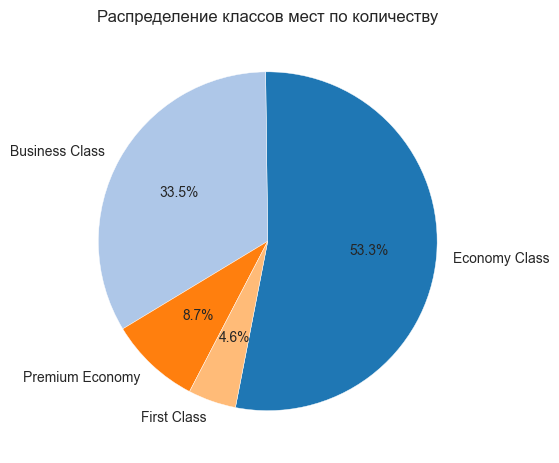

In [357]:
# Код
seat_type_distr = df['seat_type'].value_counts()

plt.title('Распределение классов мест по количеству')
plt.pie(seat_type_distr, labels=seat_type_distr.index, normalize=True, autopct="%1.1f%%", startangle=259, colors=colors)#, colors=['o'])
plt.show()

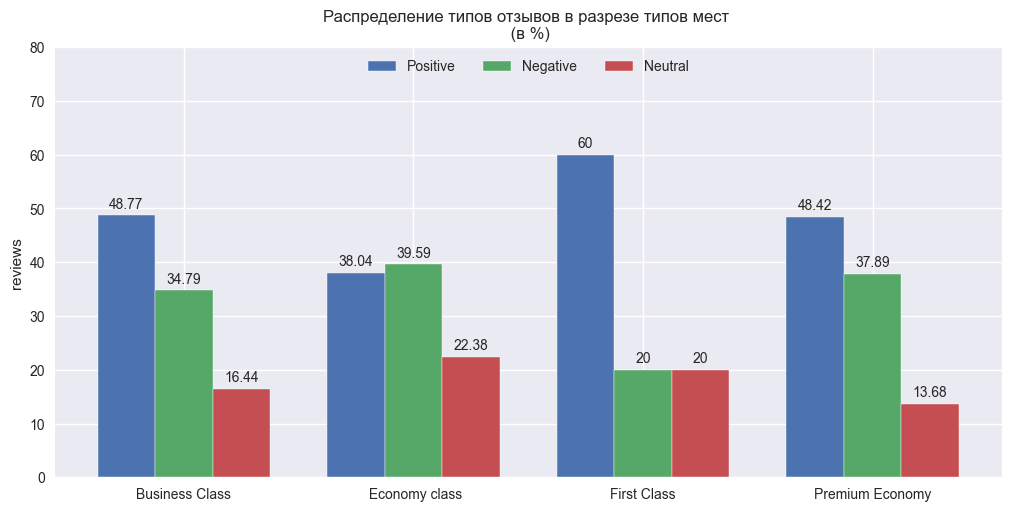

In [358]:
# Код
seat_type_sentiment = (df.groupby('seat_type')[['Sentiment']].value_counts(normalize=True)*100).round(2)
pos = seat_type_sentiment[(seat_type_sentiment.index == ('Economy Class', 'Positive')) | (seat_type_sentiment.index == ('Premium Economy', 'Positive')) | 
                    (seat_type_sentiment.index == ('Business Class', 'Positive')) | (seat_type_sentiment.index == ('First Class', 'Positive'))]

neg = seat_type_sentiment[(seat_type_sentiment.index == ('Economy Class', 'Negative')) | (seat_type_sentiment.index == ('Premium Economy', 'Negative')) | 
                    (seat_type_sentiment.index == ('Business Class', 'Negative')) | (seat_type_sentiment.index == ('First Class', 'Negative'))]

neu = seat_type_sentiment[(seat_type_sentiment.index == ('Economy Class', 'Neutral')) | (seat_type_sentiment.index == ('Premium Economy', 'Neutral')) | 
                    (seat_type_sentiment.index == ('Business Class', 'Neutral')) | (seat_type_sentiment.index == ('First Class', 'Neutral'))]

pos_dict = {'Positive': pos.values}
neg_dict = {'Negative': neg.values}
neu_dict = {'Neutral': neu.values}
dictv = pos_dict | neg_dict | neu_dict

groups = ("Business Class", " Economy class", "First Class", "Premium Economy")

x = np.arange(len(groups))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Barplot
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for attribute, measurement in dictv.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('reviews')
ax.set_title('Распределение типов отзывов в разрезе типов мест \n (в %)')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper center', ncols=4)
ax.set_ylim(0, 80)

plt.show()

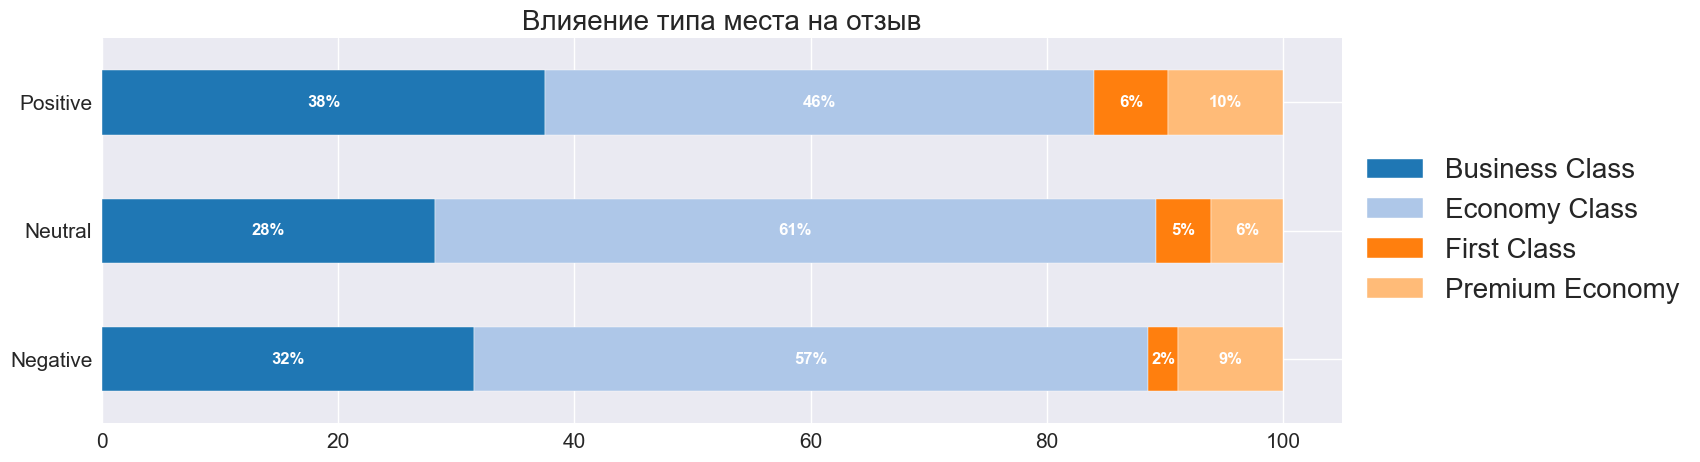

In [359]:
# Код
pos = df[df.Sentiment == 'Positive'].groupby('seat_type')[['reviews']].count()
pos['Positive'] = pos.reviews.map(lambda v: ((v / pos.values.sum())*100).round(1))

neg = df[df.Sentiment == 'Negative'].groupby('seat_type')[['reviews']].count()
neg['Negative'] = neg.reviews.map(lambda v: ((v / neg.values.sum())*100).round(1))

neu = df[df.Sentiment == 'Neutral'].groupby('seat_type')[['reviews']].count()
neu['Neutral'] = neu.reviews.map(lambda v: ((v / neu.values.sum())*100).round(1))

sentiment_by_seat_type = pd.concat([neg, neu, pos], axis=1).drop('reviews', axis=1)


ax = sentiment_by_seat_type.T.plot.barh(stacked=True, figsize=(16, 5), color=colors)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.title('Влияение типа места на отзыв', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
# annotations:
for c in ax.containers:
    
    # format the number of decimal places and replace 0 with an empty string
    labels = [f'{w:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center', color='white', fontweight='bold', size=12)

> **Наибольшее влияение** на все три типа отзывов оказывают пассажиры из эконом класса. На втором месте находятся пассажиры из бизнес класса. Это можно объяснить преобладанием количества пассажиров эконом и бизнес класса над другими типами мест.

---

## ![Image](//2.downloader.disk.yandex.ru/preview/c37c48ea27351002ebc9872397566e4b62df359c0d0cbe24da8c04e8ad2406b4/inf/BZ94zQtfJfD7DmFVQYdCnT9Tqgi5-nsiWikXNpgHoP9fPKJYj_2sd970qVGgDC6v98NlKd1uuui7c4ZeBBDQKQ%3D%3D?uid=1095354716&filename=pngegg%20%283%29.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&owner_uid=1095354716&tknv=v2&size=1348x931)     Анализ маршрута следования

1) **Топ-10 маршрутов следования**

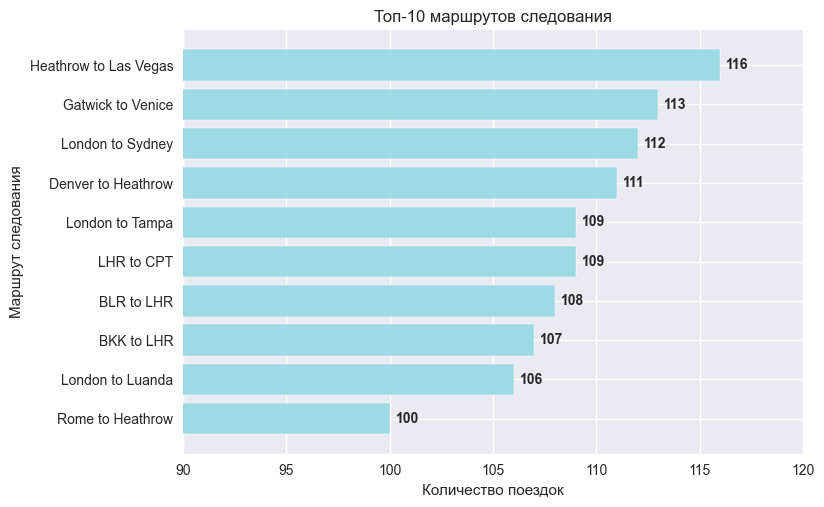

In [360]:
# Код
#df_route_recommended = df.groupby(['recommended', 'route'])[['reviews']].count().sort_values(by='reviews', ascending=False)
top_reviewed_routes = df.groupby('route')[['reviews']].count().sort_values(by='reviews', ascending=True)#.plot.barh()

# Barplot
ax = plt.barh(top_reviewed_routes.index, top_reviewed_routes.reviews.values, color=colors[::-1])
for i, v in enumerate(top_reviewed_routes.reviews):
    plt.text(v+0.3, i-0.1, str(v), fontweight='bold')

plt.xlim(90, 120)
plt.title('Топ-10 маршрутов следования')
plt.xlabel('Количество поездок')
plt.ylabel('Маршрут следования')
plt.show()

> Самым популярным маршрутом является полет из **Рима в Лондон**. На втором месте - полет из Лондона в Луанду.

2) **Соотношение положительных и отрицательных отзывов по каждому маршруту из списка ТОП-10**

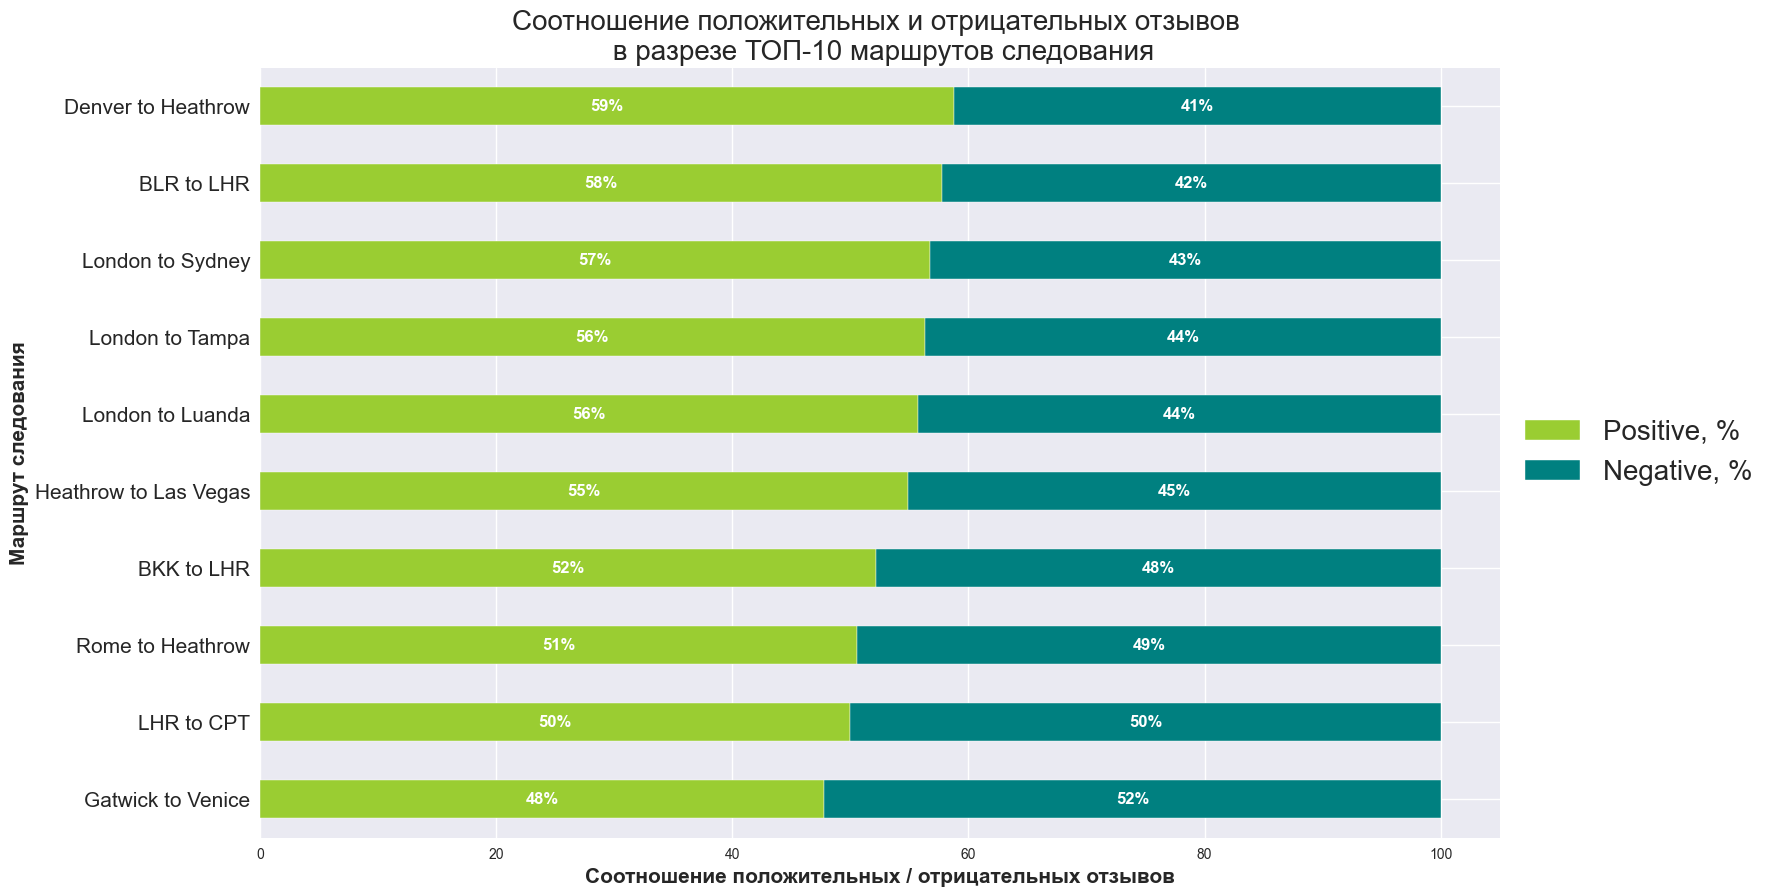

In [361]:
# Код
# Создаем новый dataframe  и вычисляем доли
negpos_routes = df[(df.Sentiment == 'Positive') | (df.Sentiment == 'Negative')].groupby(['route', 'Sentiment'])[['reviews']].count().reset_index()#.plot(kind='bar')
neg_routes = negpos_routes[negpos_routes.Sentiment == 'Negative'].groupby('route')[['reviews']].sum().reset_index()
pos_routes = negpos_routes[negpos_routes.Sentiment == 'Positive'].groupby('route')[['reviews']].sum().reset_index()
neg_pos_routes = pd.concat([pos_routes, neg_routes], axis=1)
neg_pos_routes.columns = ['Route', 'Positive', 'rroute', 'Negative']
neg_pos_routes.drop('rroute', axis=1, inplace=True)
neg_pos_routes.set_index('Route', inplace=True)
neg_pos_routes['All'] = neg_pos_routes.Positive + neg_pos_routes.Negative
neg_pos_routes['Positive, %'] = np.where(neg_pos_routes.Positive != np.nan, ((neg_pos_routes.Positive / neg_pos_routes.All)*100).round(1), np.nan)
neg_pos_routes['Negative, %'] = np.where(neg_pos_routes.Negative != np.nan, ((neg_pos_routes.Negative / neg_pos_routes.All)*100).round(1), np.nan)
neg_pos_routes.drop(['Positive', 'Negative', 'All'], axis=1, inplace=True)
neg_pos_routes.sort_values(by='Positive, %', ascending=True, inplace=True)

# plot
ax = neg_pos_routes.plot.barh(stacked=True, figsize=(16, 10), color=['yellowgreen', 'teal'])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.title('Соотношение положительных и отрицательных отзывов \n в разрезе ТОП-10 маршрутов следования', size=20)
plt.ylabel('Маршрут следования', size=15, fontweight='bold')
plt.xlabel('Соотношение положительных / отрицательных отзывов', size=15, fontweight='bold')
plt.yticks(size=15)
# annotations:
for c in ax.containers:
    
    # format the number of decimal places and replace 0 with an empty string
    labels = [f'{w:.0f}%' if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center', color='white', fontweight='bold', size=12)

> Маршрут, имеющий больше всего **положительных отзывов** (в относительном соотношении) является полет из Денвера в Лондон.
>
>**Наименее понравивишимся** маршрутом является полет из Гатвика (Англия) в Венецию.

---

## **Завершение**

Таким образом, Исследовательский анализ данных (EDA) по данным пассажиров British Airway проведен. 

В ходе анализа были выявлены следующие **интересные факты и закономерности**:
> Во время пандемии COVID-19 количество отзывов сильно снизилось. Также, доля положительных отзывов значительно упала по сравнению с периодом до начала пандемии. К тому же, в период после пандемии, общее количество отзывов снизилось еще сильнее. **Моё предположение - так как в период пандемии COVID-19 авиаотрасль была одной из самых экономически пострадавших отраслей, вероятнее всего, нашей компании пришлось существенно снизить свои расходы. Таким образом, качество сервиса сильно упало.** Однако, после пандемии общее количество отзывов выросло, что говорит о неком экономическом восстановлении компании.
> 
> Большинство людей предпочитает летать эконом классом. Эта же группа оставляет в большинстве оставляет негативные отзывы (в соотношении с положительными и нейтральными). Больше всего положительных отзывов оставляет группа людей, летевших первым классом. 